In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
data = pd.read_csv(r'../data/PCA_selected_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    569 non-null    int64  
 1   diagnosis             569 non-null    object 
 2   smoothness_se         569 non-null    float64
 3   symmetry_mean         569 non-null    float64
 4   symmetry_se           569 non-null    float64
 5   texture_se            569 non-null    float64
 6   smoothness_worst      569 non-null    float64
 7   smoothness_mean       569 non-null    float64
 8   fractal_dimension_se  569 non-null    float64
 9   concavity_se          569 non-null    float64
 10  concave points_se     569 non-null    float64
 11  symmetry_worst        569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


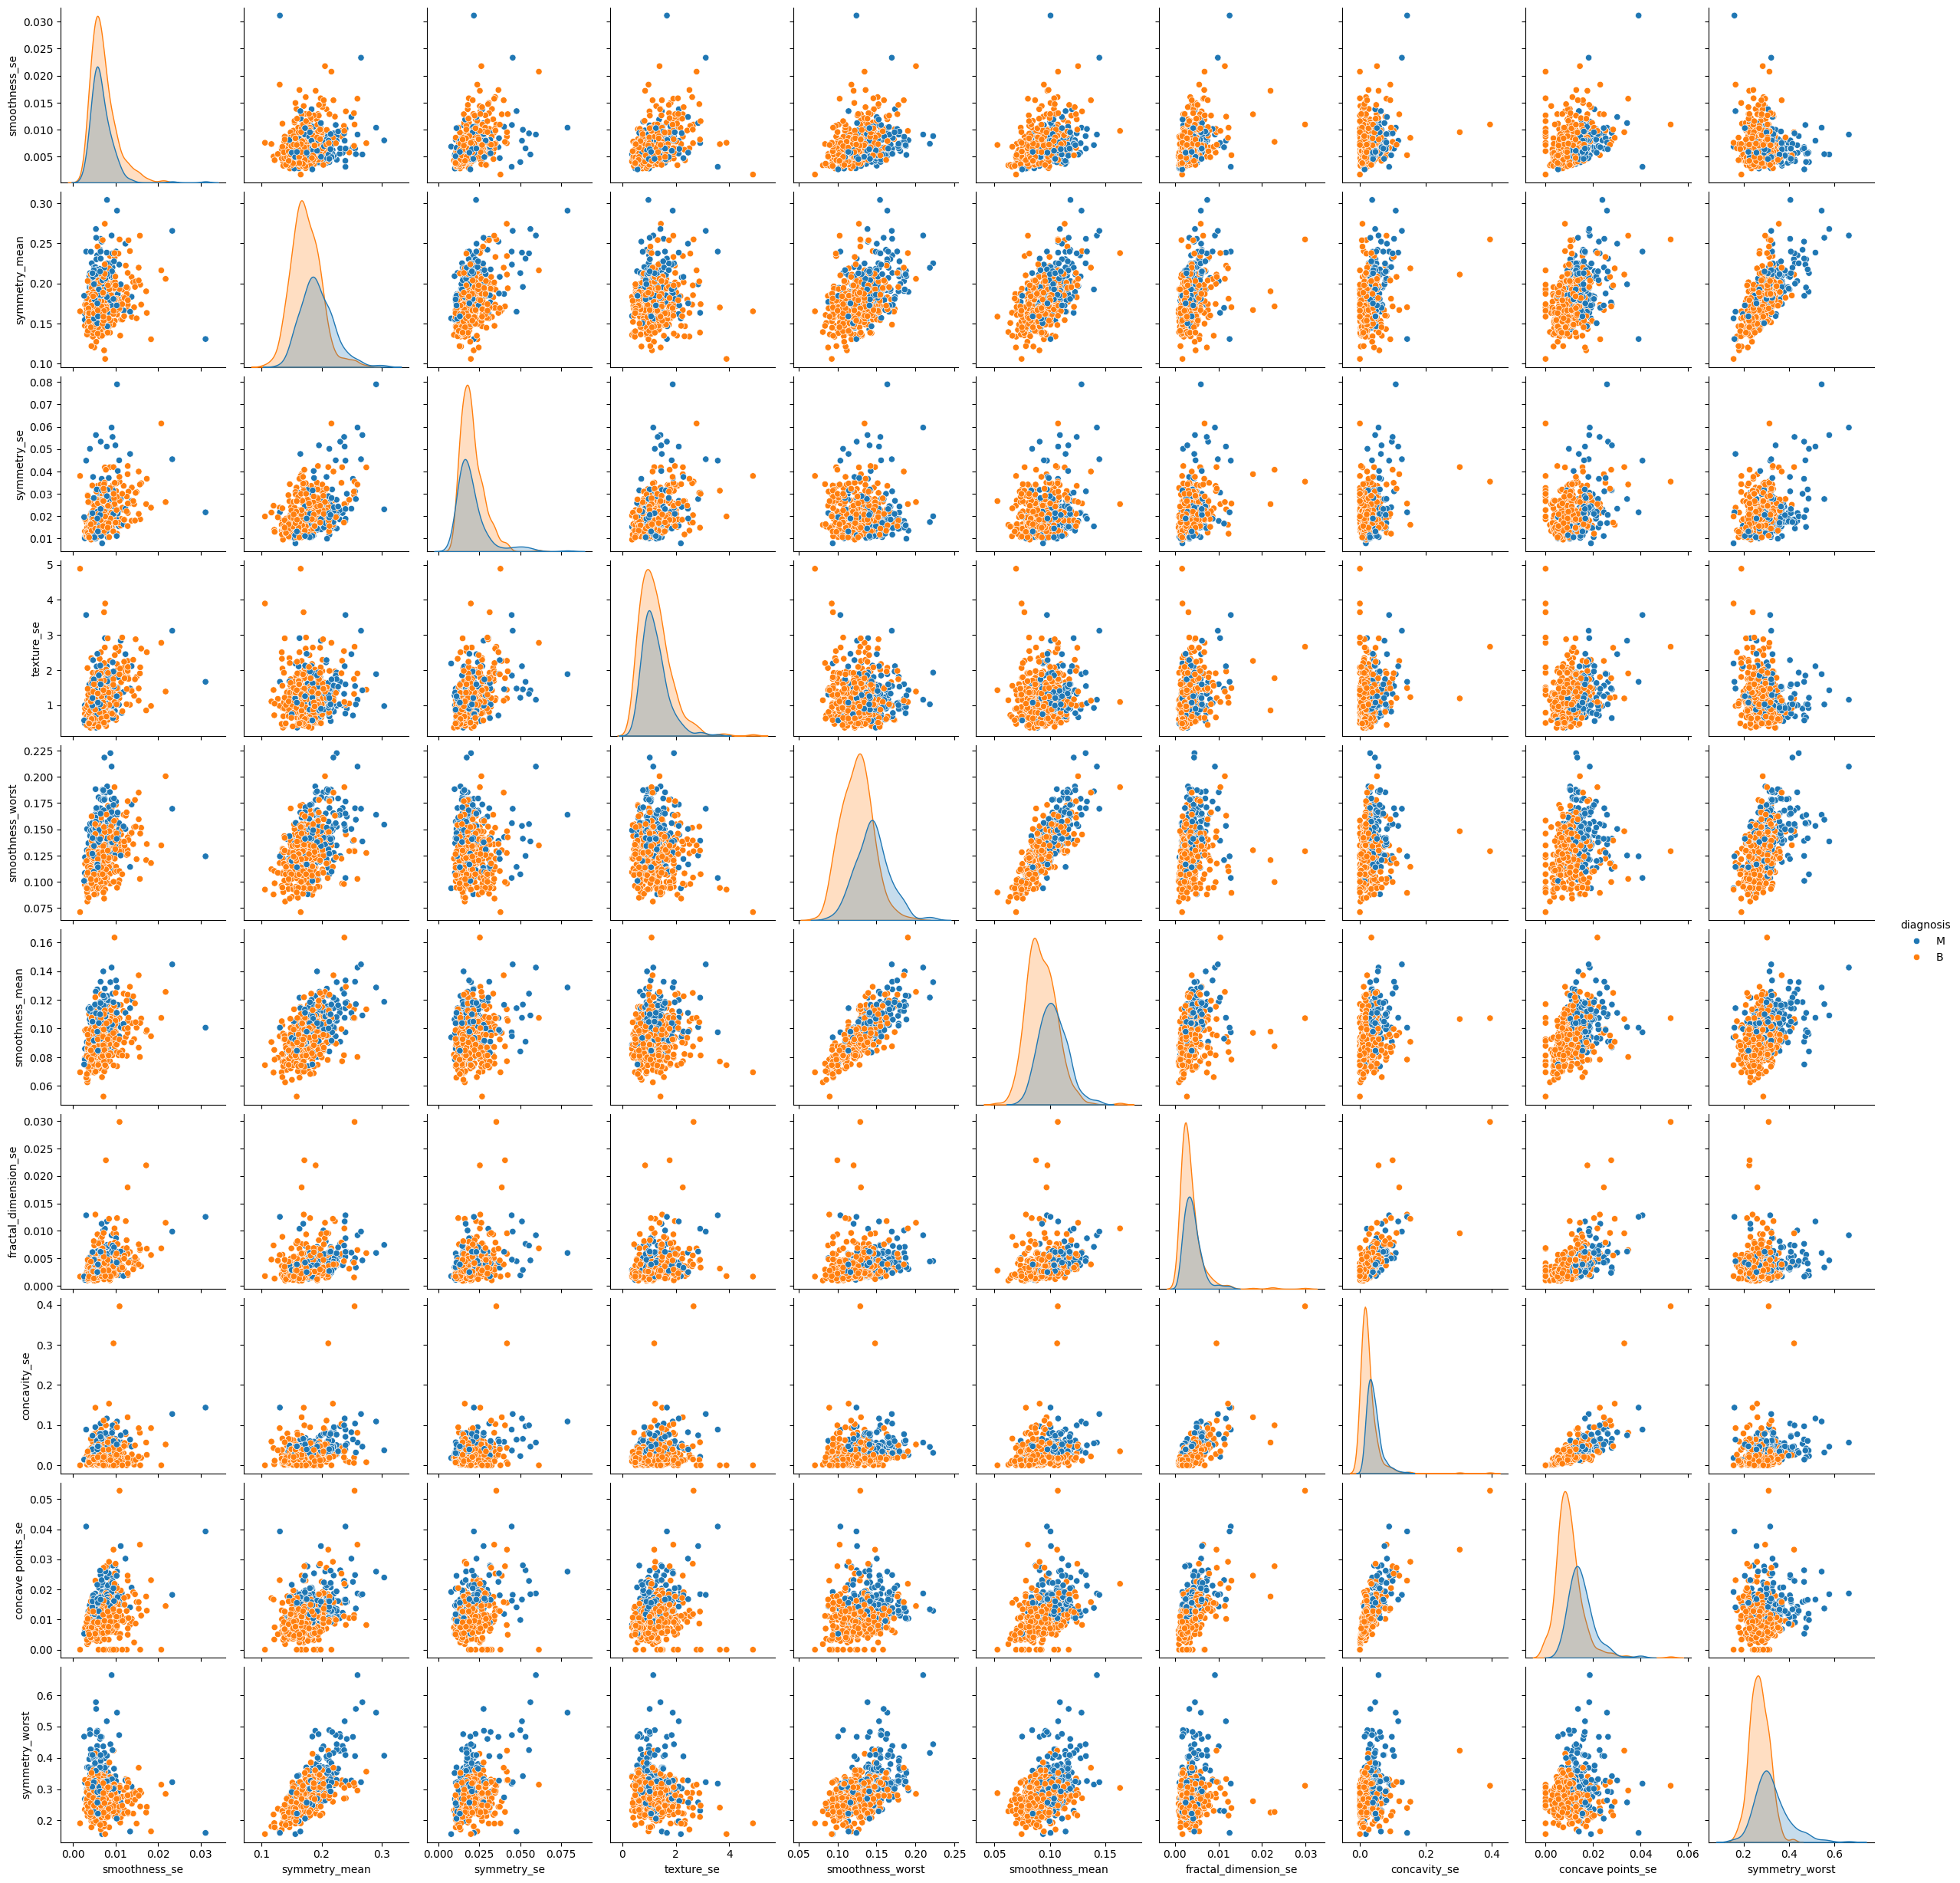

In [7]:
# sns pairplot to visualize relationships between features
sns.pairplot(data.drop('id', axis=1), hue='diagnosis')
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# ---- 1. Data preparation ----
def prepare_data(df, target_col='diagnosis'):
    """
    Prepares the dataset:
    - Removes NaN rows
    - Encodes target column if categorical
    - Scales numeric features
    """
    # Drop rows with missing values
    df_clean = df.dropna()
    
    # Encode target if categorical
    le = LabelEncoder()
    y = le.fit_transform(df_clean[target_col])
    
    # Select numeric features
    X = df_clean.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- 2. Model training functions ----

def train_knn(X_train, X_test, y_train, y_test):
    param_grid = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance']}
    knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return knn.best_estimator_, accuracy_score(y_test, y_pred)

def train_random_forest(X_train, X_test, y_train, y_test):
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return rf.best_estimator_, accuracy_score(y_test, y_pred)

def train_decision_tree(X_train, X_test, y_train, y_test):
    param_grid = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
    dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    return dt.best_estimator_, accuracy_score(y_test, y_pred)

def train_naive_bayes(X_train, X_test, y_train, y_test):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    return nb, accuracy_score(y_test, y_pred)



# ---- 3. Global function to run all models ----
def run_all_models(df, target_col='diagnosis'):
    X_train, X_test, y_train, y_test = prepare_data(df, target_col)
    
    models = {
        "KNN": train_knn,
        "Random Forest": train_random_forest,
        "Decision Tree": train_decision_tree,
        "Naive Bayes": train_naive_bayes,
    }
    
    results = {}
    
    for name, func in models.items():
        model, acc = func(X_train, X_test, y_train, y_test)
        results[name] = acc
        print(f"{name} accuracy: {acc:.4f}")
    
    return results

# ---- Usage example ----
results = run_all_models(data)


KNN accuracy: 0.8158
Random Forest accuracy: 0.8596
Decision Tree accuracy: 0.8158
Naive Bayes accuracy: 0.7456
